In [12]:
#面向对象编程
f = open("new_file",'w')#py3用open不用file

In [7]:
f.mode

'w'

In [8]:
f.close

<function TextIOWrapper.close>

In [9]:
f.mode = 'r'#py3可以改mode

In [10]:
f.mode()

TypeError: 'str' object is not callable

In [11]:
f.mode

'r'

In [13]:
f.write('Hi.\n')

4

In [14]:
f.seek(0)

0

In [15]:
f.write('Hola.\n')

6

In [17]:
f.close()

In [18]:
!rm new_file

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [21]:
class Forest(object):
    def __init__(self, size=(150, 150), p_sapling=0.0025, p_lightning=5.e-6, name=None):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.forest_fires = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        if name is not None:
            self.name = name
        else:
            self.name = self.__class__.__name__

    @property
    def num_cells(self):
        return self.size[0] * self.size[1]

    @property
    def tree_fraction(self):
        return self.trees.sum() / float(self.num_cells)

    @property
    def fire_fraction(self):
        return self.forest_fires.sum() / float(self.num_cells)

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

    def grow_trees(self):
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

    def start_fires(self):
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.forest_fires[lightning_strikes] = True
        
    def burn_trees(self):
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.forest_fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.forest_fires] = False
        self.forest_fires = new_fires

    def _rand_bool(self, p):
        return np.random.uniform(size=self.trees.shape) < p

In [30]:
forest = Forest()

In [34]:
print (forest.trees）

SyntaxError: invalid character in identifier (<ipython-input-34-908bbeadea24>, line 1)

In [33]:
print (forest.forest_fires)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


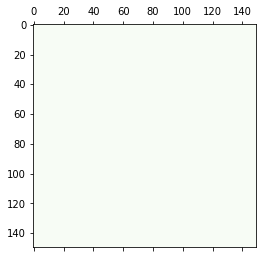

In [35]:
plt.matshow(forest.trees, cmap=plt.cm.Greens)

plt.show()

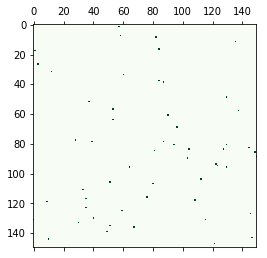

In [36]:
forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
plt.show()

0.29173333333333334


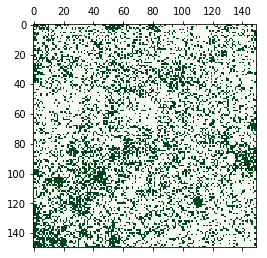

In [38]:
for i in range(500):
    forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
print (forest.tree_fraction)

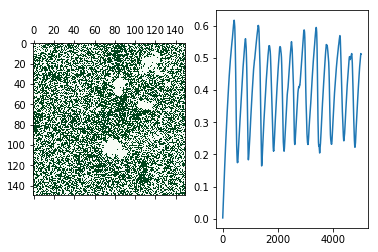

In [39]:
forest = Forest()
tree_fractions = []
for i in range(5000):
    forest.advance_one_step()
    tree_fractions.append(forest.tree_fraction)
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax0.matshow(forest.trees, cmap=plt.cm.Greens)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(tree_fractions)

plt.show()

In [40]:
a = 25

In [41]:
b = a

In [42]:
type(b)

int

In [44]:
id(a)#id看是否是对象

1470591200